In [293]:
from datetime import datetime, timedelta
import statsmodels.api as sm
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
from scipy.stats import spearmanr
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pickle
import matplotlib.pyplot as plt
import time
import warnings
import os
warnings.filterwarnings('ignore', category=FutureWarning)
root = '/Users/ella/test/'
period = 20
idx = '000300.XSHG'

In [284]:
returns_df = pd.read_csv(os.path.join(root, 'returns_df'),index_col=0)
price = pd.read_csv(os.path.join(root, 'get_price'),index_col=0)

In [237]:
def func(result, period=20):
    returns_df = pd.read_csv(os.path.join(root, 'returns_df'),index_col=0)
    price = pd.read_csv(os.path.join(root, 'get_price'),index_col=0)
    layer_ind = result.apply(lambda x: pd.qcut(x.rank(method="first"), q=10, labels=[10,9,8,7,6,5,4,3,2,1]), axis=1)
    r = []
    dates = pd.Series(result.index)
    for i in range(0, len(dates), period):
        date = dates[0]
        dates = dates.shift(-period)
        end_date = dates[0]
        if end_date == None:
            break
        period_daily_return = (price.loc[date: end_date].diff()/price.loc[date])[1:]
        all_average_returns_df = pd.concat([period_daily_return])#.cumsum()
        period_label = layer_ind.loc[date: end_date].iloc[0]
        group_1_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 1].index]
        group_1_returns = group_1_returns.mean(axis=1).to_frame(name=1)
        group_2_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 2].index]
        group_2_returns = group_2_returns.mean(axis=1).to_frame(name=2)
        group_3_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 3].index]
        group_3_returns = group_3_returns.mean(axis=1).to_frame(name=3)
        group_4_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 4].index]
        group_4_returns = group_4_returns.mean(axis=1).to_frame(name=4)
        group_5_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 5].index]
        group_5_returns = group_5_returns.mean(axis=1).to_frame(name=5)
        group_6_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 6].index]
        group_6_returns = group_6_returns.mean(axis=1).to_frame(name=6)
        group_7_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 7].index]
        group_7_returns = group_7_returns.mean(axis=1).to_frame(name=7)
        group_8_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 8].index]
        group_8_returns = group_8_returns.mean(axis=1).to_frame(name=8)
        group_9_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 9].index]
        group_9_returns = group_9_returns.mean(axis=1).to_frame(name=9)
        group_10_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 10].index]
        group_10_returns = group_10_returns.mean(axis=1).to_frame(name=10)
        r.append(pd.concat([group_1_returns, group_2_returns, group_3_returns, group_4_returns, group_5_returns, group_6_returns, group_7_returns, group_8_returns, group_9_returns, group_10_returns], axis=1))
    all_average_returns_df = pd.concat(r)#.cumsum()
    


 
    all_average_returns_df.index = pd.to_datetime(all_average_returns_df.index)
    plt.figure(figsize=(40, 6))
    all_average_returns_df = all_average_returns_df[all_average_returns_df.index <= '2024-01-01']
    df = (1 + all_average_returns_df).cumprod()
    # ‰∏∫ÊØè‰∏™ÂàóÊ†áÁ≠æÁîªÂá∫ÊäòÁ∫øÂõæ
    for column in df.columns:
        plt.plot(df.index, df[column], label=column, alpha=0.4)

    plt.xlabel('Date')
    plt.ylabel('Group Return')
    plt.title('Line Graph for Each Label')

    # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æÁöÑÊ†ºÂºè
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # ÊØèÈöî‰∏Ä‰∏™ÊúàÊòæÁ§∫‰∏ÄÊ¨°
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # ÊóãËΩ¨xËΩ¥Ê†áÁ≠æ‰ª•‰æøÊõ¥Â•ΩÁöÑÊòæÁ§∫
    plt.savefig('line_graph.png')
    plt.show()


    idx_long = all_average_returns_df.cumsum().mean()[all_average_returns_df.cumsum().mean().values == all_average_returns_df.cumsum().mean().max()].index
    idx_short = all_average_returns_df.cumsum().mean()[all_average_returns_df.cumsum().mean().values == all_average_returns_df.cumsum().mean().min()].index
    long = all_average_returns_df[idx_long]
    short = all_average_returns_df[idx_short]
    long_cumulative = (1 + long).cumprod()
    short_cumulative = (1 + short).cumprod()
    #long_cumulative = 1 + long.cumsum()
    #short_cumulative = 1 + short.cumsum()

    plt.figure(figsize=(17, 7))
    all_average_returns_df.index = pd.to_datetime(all_average_returns_df.index)
    plt.plot(all_average_returns_df.index, long_cumulative, label='long', color='r', linewidth=2, alpha = 0.85)
    plt.plot(all_average_returns_df.index, short_cumulative, label='short', color='b', linewidth=2, alpha = 0.85)
    #plt.plot(all_average_returns_df.index, long_cumulative/short_cumulative, label='long/short', color='orange',alpha = 0.85)#ÈúÄË¶ÅÂçïÁã¨‰∏Ä‰∏™Êï∞ËΩ¥
    plt.xlabel('Date')
    plt.ylabel('Excess Net Value')
    plt.title('Excess Net Value')
    # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æÁöÑÊ†ºÂºè
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # ÊØèÈöî‰∏Ä‰∏™ÊúàÊòæÁ§∫‰∏ÄÊ¨°
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # ÊóãËΩ¨xËΩ¥Ê†áÁ≠æ‰ª•‰æøÊõ¥Â•ΩÁöÑÊòæÁ§∫
    plt.show()

    #all_average_returns_df['excess_return'] = all_average_returns_df[5] - all_average_returns_df[1]
    #all_average_returns_df['excess_net_value'] = (1 + all_average_returns_df['excess_return']).cumprod()
    return all_average_returns_df#['excess_net_value']



    

In [273]:
def func1(result, period=20):
    returns_df = pd.read_csv(os.path.join(root, 'returns_df'),index_col=0)
    price = pd.read_csv(os.path.join(root, 'get_price'),index_col=0)
    layer_ind = result.apply(lambda x: pd.qcut(x.rank(method="first"), q=10, labels=[10,9,8,7,6,5,4,3,2,1]), axis=1)
    r = []
    dates = pd.Series(result.index)
    for i in range(0, len(dates), period):
        date = dates[0]
        dates = dates.shift(-period)
        end_date = dates[0]
        if end_date == None:
            break
        period_daily_return = (price.loc[date: end_date].diff()/price.loc[date])[1:]
        all_average_returns_df = pd.concat([period_daily_return])#.cumsum()
        period_label = layer_ind.loc[date: end_date].iloc[0]
        group_1_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 1].index]
        group_1_returns = group_1_returns.mean(axis=1).to_frame(name=1)
        group_2_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 2].index]
        group_2_returns = group_2_returns.mean(axis=1).to_frame(name=2)
        group_3_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 3].index]
        group_3_returns = group_3_returns.mean(axis=1).to_frame(name=3)
        group_4_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 4].index]
        group_4_returns = group_4_returns.mean(axis=1).to_frame(name=4)
        group_5_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 5].index]
        group_5_returns = group_5_returns.mean(axis=1).to_frame(name=5)
        group_6_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 6].index]
        group_6_returns = group_6_returns.mean(axis=1).to_frame(name=6)
        group_7_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 7].index]
        group_7_returns = group_7_returns.mean(axis=1).to_frame(name=7)
        group_8_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 8].index]
        group_8_returns = group_8_returns.mean(axis=1).to_frame(name=8)
        group_9_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 9].index]
        group_9_returns = group_9_returns.mean(axis=1).to_frame(name=9)
        group_10_returns = all_average_returns_df.loc[date: end_date][period_label[period_label == 10].index]
        group_10_returns = group_10_returns.mean(axis=1).to_frame(name=10)
        r.append(pd.concat([group_1_returns, group_2_returns, group_3_returns, group_4_returns, group_5_returns, group_6_returns, group_7_returns, group_8_returns, group_9_returns, group_10_returns], axis=1))
    all_average_returns_df = pd.concat(r)#.cumsum()
    all_average_returns_df = all_average_returns_df[all_average_returns_df.index <= '2024-01-01']
    idx_long = all_average_returns_df.cumsum().mean()[all_average_returns_df.cumsum().mean().values == all_average_returns_df.cumsum().mean().max()].index
    long = all_average_returns_df[idx_long]
    long_cumulative = (1 + long).cumprod()
    #all_average_returns_df = all_average_returns_df[all_average_returns_df.index <= '2024-01-01']
    #all_average_returns_df['excess_net_value'] = 1 + abs((1 + all_average_returns_df[10]).cumprod() - (1 + all_average_returns_df[1]).cumprod())
    
    return long_cumulative[idx_long]#all_average_returns_df['excess_net_value']

In [6]:
def remove_extreme_and_standardize(df, file_name = 'std', n = 3, root = root):
    """
    [input]
    df = Âõ†Â≠êÂÄº
    [output]
    Ê†áÂáÜÂåñËøáÂêéÁöÑÂõ†Â≠êÂÄºdf
    MADÂéªÊûÅÂÄºÂπ∂Ê†áÂáÜÂåñÂõ†Â≠êÂÄº
    """
    #ÂéªÊûÅÂÄº
    median = df.median(axis=1) #ÊØèË°å: axis=1
    mad = np.abs(df.subtract(median, axis=0)).median(axis=1)
    lower_limit = median - n * 1.4826 * mad
    upper_limit = median + n * 1.4826 * mad
    df_clipped = df.clip(lower=lower_limit, upper=upper_limit, axis=0)
    # Ê†áÂáÜÂåñ
    mean = df_clipped.mean(axis=1)
    std = df_clipped.std(axis=1)
    df_standardized = df_clipped.sub(mean, axis=0).div(std, axis=0) 
    return df_standardized

In [7]:
def filter_stocks(df, user_input):
    """
    ÂèØ‰ª•ËæìÂÖ•ÊåáÊï∞ÊàêÂàÜÁöÑÂ≠óÊÆµÊù•Á≠õÈÄâÂè™Â±û‰∫éÈÇ£‰∏™ÊåáÊï∞ÊàêÂàÜÁöÑËÇ°Á•®
    """
    with open(os.path.join(root, f'{user_input}.pickle'), 'rb') as file:
        filter = pickle.load(file)
    df = df.T
    df.index.name = 'date'
    filtered_df = pd.DataFrame()
    # Âà©Áî®Ëé∑ÂèñÁöÑÊåáÊï∞ÊàêÂàÜËÇ°Â≠óÂÖ∏‰∏≠ÁöÑÊó•ÊúüÂíåËÇ°Á•®ÂàóË°®ËøõË°åËøáÊª§
    for date, stocks in filter.items():
        if date in df.index:
            try:
                # ÈÄâÊã©ÁâπÂÆöÊó•ÊúüÁöÑË°åÂπ∂ÈáçÊñ∞Á¥¢Âºï‰ª•‰ªÖ‰øùÁïôÊåáÂÆöËÇ°Á•®Âàó
                filtered_data = df.loc[date, stocks]
                # Â∞ÜËøáÊª§ÂêéÁöÑÊï∞ÊçÆÊ∑ªÂä†Âà∞Êñ∞ÁöÑdataframe‰∏≠
                filtered_df = pd.concat([filtered_df, filtered_data.to_frame().T], axis=0)
            except KeyError:
                # Ë∑≥Ëøá‰∏çÂ≠òÂú®ÁöÑËÇ°Á•®
                available_stocks = [stock for stock in stocks if stock in df.columns]
                if available_stocks:
                    filtered_data = df.loc[date, available_stocks]
                    filtered_df = pd.concat([filtered_df, filtered_data.to_frame().T], axis=0)
    return filtered_df

In [8]:
def filter_stocks1(df, user_input):
    """
    ÂèØ‰ª•ËæìÂÖ•ÊåáÊï∞ÊàêÂàÜÁöÑÂ≠óÊÆµÊù•Á≠õÈÄâÂè™Â±û‰∫éÈÇ£‰∏™ÊåáÊï∞ÊàêÂàÜÁöÑËÇ°Á•®
    """
    with open(os.path.join(root, f'{user_input}.pickle'), 'rb') as file:
        filter = pickle.load(file)
    #df = df.T
    #df.index.name = 'date'
    filtered_df = pd.DataFrame()
    # Âà©Áî®Ëé∑ÂèñÁöÑÊåáÊï∞ÊàêÂàÜËÇ°Â≠óÂÖ∏‰∏≠ÁöÑÊó•ÊúüÂíåËÇ°Á•®ÂàóË°®ËøõË°åËøáÊª§
    for date, stocks in filter.items():
        if date in df.index:
            try:
                # ÈÄâÊã©ÁâπÂÆöÊó•ÊúüÁöÑË°åÂπ∂ÈáçÊñ∞Á¥¢Âºï‰ª•‰ªÖ‰øùÁïôÊåáÂÆöËÇ°Á•®Âàó
                filtered_data = df.loc[date, stocks]
                # Â∞ÜËøáÊª§ÂêéÁöÑÊï∞ÊçÆÊ∑ªÂä†Âà∞Êñ∞ÁöÑdataframe‰∏≠
                filtered_df = pd.concat([filtered_df, filtered_data.to_frame().T], axis=0)
            except KeyError:
                # Ë∑≥Ëøá‰∏çÂ≠òÂú®ÁöÑËÇ°Á•®
                available_stocks = [stock for stock in stocks if stock in df.columns]
                if available_stocks:
                    filtered_data = df.loc[date, available_stocks]
                    filtered_df = pd.concat([filtered_df, filtered_data.to_frame().T], axis=0)
    return filtered_df

In [68]:
def graph(df1, df2, benchmark):
    df1.index = pd.to_datetime(df1.index)
    plt.figure(figsize=(17, 7))
    plt.plot(df1.index, df1, label='regress', color='r', linewidth=2, alpha = 0.85)
    plt.plot(df1.index, df2, label='traditional', color='b', linewidth=2, alpha = 0.85)
    plt.plot(df1.index, benchmark, label='benchmark', color='grey', linewidth=2, alpha = 0.85)

    plt.plot(df1.index, df2/benchmark, label='traditional/benchmark', color='yellow', linewidth=2, alpha = 0.85)
    plt.plot(df1.index, df1.values/benchmark.values, label='regress/benchmark', color='orange', linewidth=2, alpha = 0.85)
    #plt.plot(df1.index, df2, label='short', color='b', linewidth=2, alpha = 0.85)
    #plt.plot(all_average_returns_df.index, long_cumulative/short_cumulative, label='long/short', color='orange',alpha = 0.85)#ÈúÄË¶ÅÂçïÁã¨‰∏Ä‰∏™Êï∞ËΩ¥
    plt.xlabel('Date')
    plt.ylabel('Excess Net Value')
    plt.title('Excess Net Value')
    # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æÁöÑÊ†ºÂºè
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # ÊØèÈöî‰∏Ä‰∏™ÊúàÊòæÁ§∫‰∏ÄÊ¨°
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # ÊóãËΩ¨xËΩ¥Ê†áÁ≠æ‰ª•‰æøÊõ¥Â•ΩÁöÑÊòæÁ§∫
    plt.show()

In [10]:
def regression(xdf, ydf, industry_dict):
    resid_df = pd.DataFrame()
    dates = list(ydf.index)
    for date in dates:
        #Ëé∑ÂèñÊØèÊó•Êï∞ÊçÆ
        daily_ind = industry_dict[date]
        daily_ind['mark_value'] = xdf.loc[date]
        daily_fac = ydf.loc[date]
        #ÂêàÂπ∂ÊØèÊó•ÊâÄÈúÄX=: Ë°å‰∏ö+Â∏ÇÂÄº
        merged = daily_ind.merge(daily_fac, left_index=True, right_index=True, how='inner').dropna()
        #y = ÂΩìÊó•Âõ†Â≠êÂÄº
        y = merged.pop(date)
        X = merged.copy()
        X = sm.add_constant(X) 
        model = sm.OLS(y, X.astype(float)).fit()
        #Ëé∑ÂèñÂõ†Â≠êÊÆãÂ∑Æ‰Ωú‰∏∫ÁªìÊûú, Âπ∂ËÆæÁΩÆÂàóÂêçÁß∞ = Êó•Êúü
        resid_series = pd.Series(model.resid, name = date)
        # Â∞ÜÊÆãÂ∑ÆÊ∑ªÂä†Âà∞resid_df‰∏≠ÔºåÊåâÂàóÂêàÂπ∂ÔºåÂπ∂Ëá™Âä®ÂØπÈΩêÁ¥¢Âºï
        resid_df = pd.concat([resid_df, resid_series], axis=1)
    return resid_df

# ùëôùëõ(ùëÑùë¢ùëéùëüùë°_ùê∏) = ùõΩ ‚ãÖ ùëôùëõ‚Å°(ùëÄùëâ) + ùõº + ùúÄ

### Ëé∑Âèñln(ùëÑùë¢ùëéùëüùë°_ùê∏)ÂçïÂ≠£Â∫¶ÂáÄÂà©Ê∂¶

In [11]:
csv_file_path = os.path.join(root, 'quart_E')
quart_E = pd.read_csv(csv_file_path, index_col=0)
quart_E = remove_extreme_and_standardize(quart_E) 

In [ ]:
quart_E

### Ëé∑Âèñln(MV)Â∏ÇÂÄº

In [106]:
csv_file_path = os.path.join(root, 'df4')
mv = pd.read_csv(csv_file_path, index_col=0)
#mv = remove_extreme_and_standardize(mv)

### Ëé∑ÂèñË°å‰∏öÊï∞ÂÄº

In [13]:
with open(os.path.join(root, 'industry_dummies_dict.pickle'), 'rb') as file:
        industry_dict = pickle.load(file)

### ËøõË°åÂõûÂΩí

In [294]:
regress1 = regression(mv, quart_E, industry_dict)

In [295]:
regress = regress1.copy()
regress = remove_extreme_and_standardize(regress)
#regress = regress.T
regress = filter_stocks(regress, idx)

### Á†îÊä•ÊñπÊ≥ïÁöÑÂçïÂ≠£EPÂõ†Â≠êÂ§öÁ©∫ÂáÄÂÄº

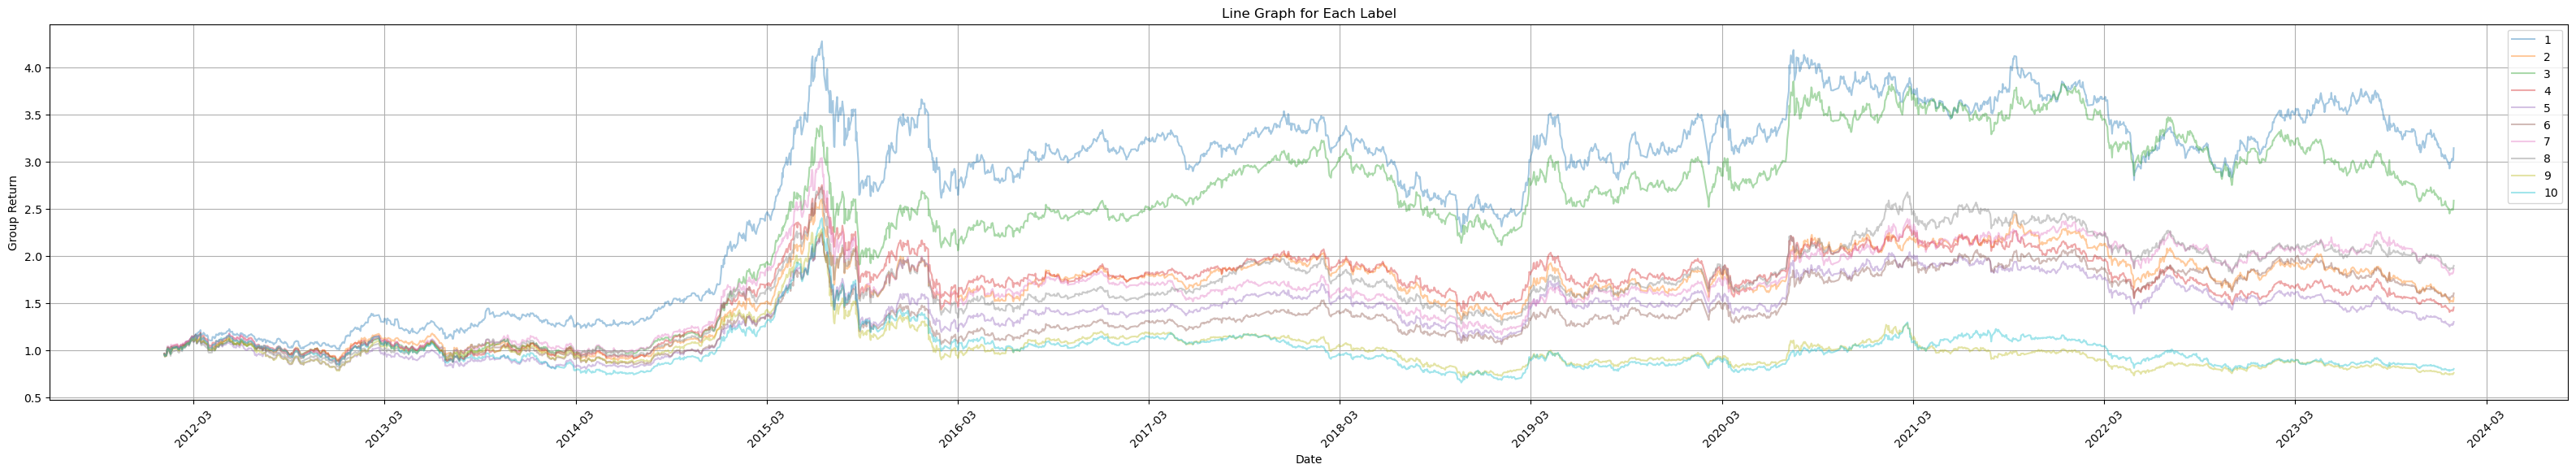

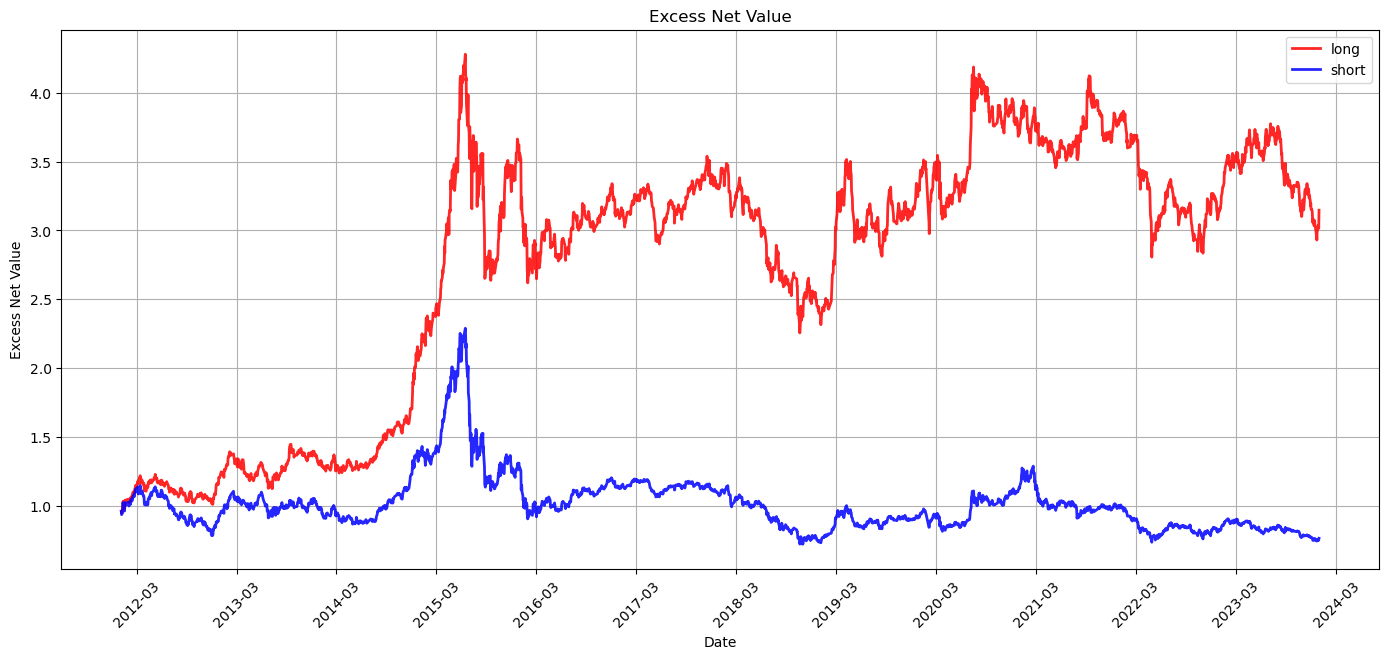

In [296]:
reg = func(regress) #Á†îÊä•ÊñπÊ≥ï

### ‰º†ÁªüÁâàÊú¨ÂõûÂΩí

In [297]:
traditional = pd.read_csv(os.path.join(root, 'ep_ratio_ttm_regress_result'),index_col=0)
#traditional = traditional.T
traditional = filter_stocks(traditional, idx)

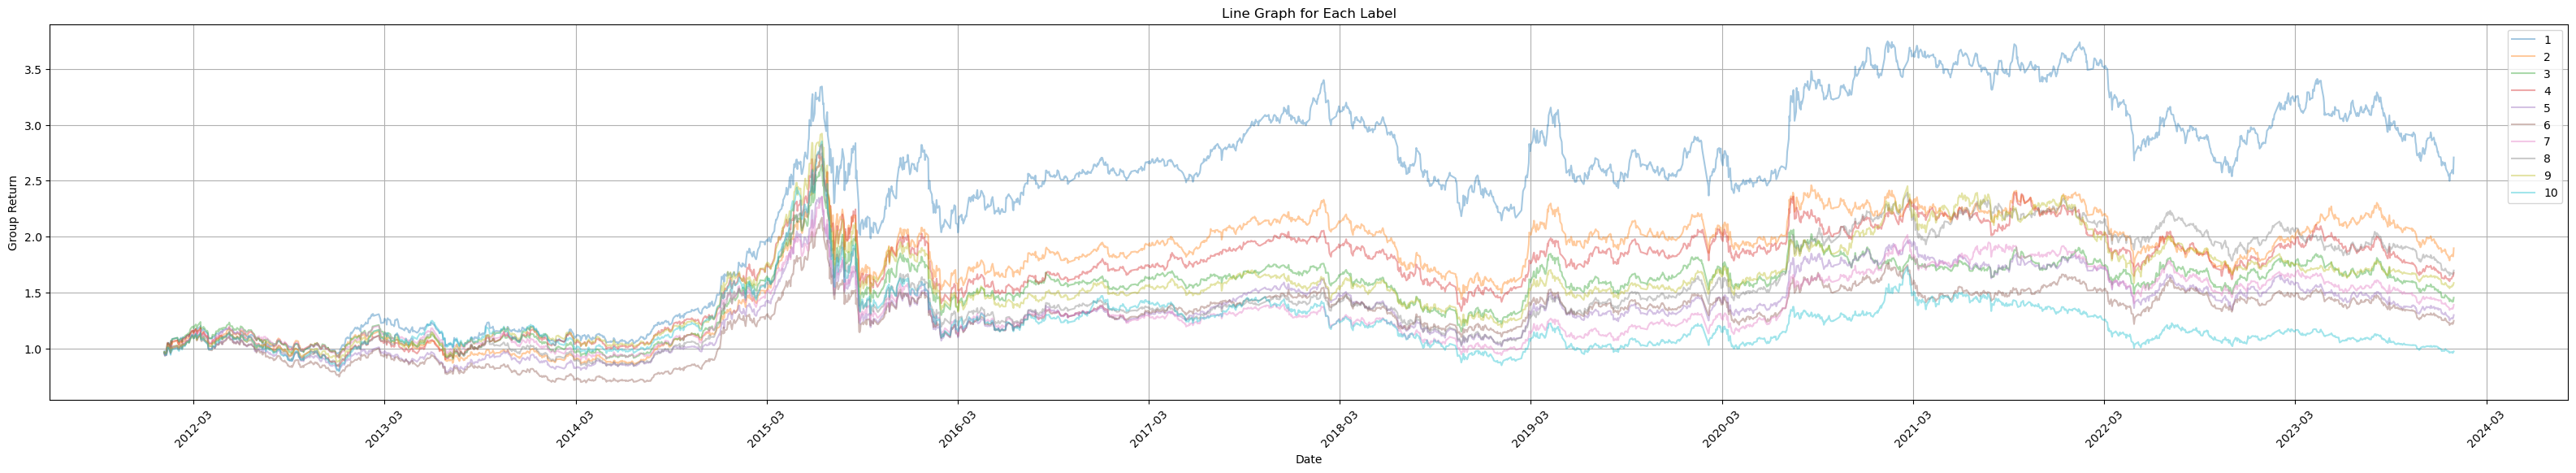

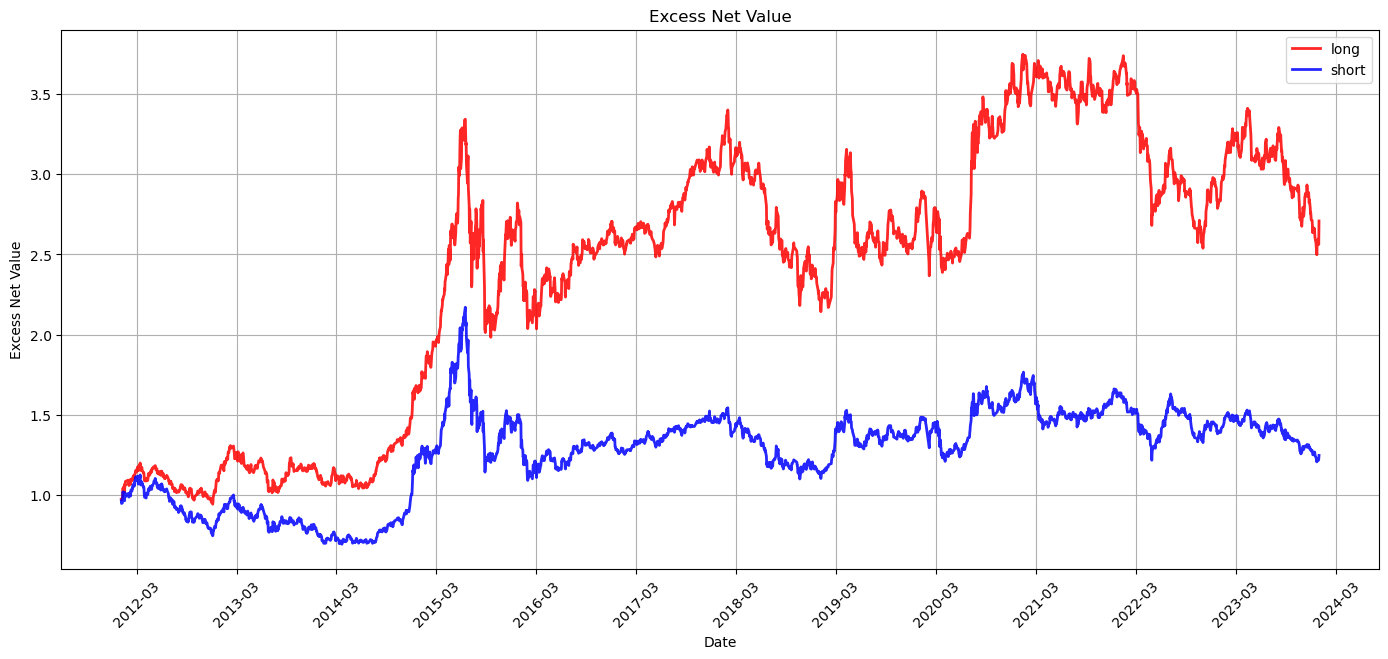

In [298]:
tra = func(traditional) #‰º†ÁªüÊñπÊ≥ï

### ÂØπÊØî‰∏§ÁßçÁöÑÂ§öÂ§¥Á©∫Â§¥

In [299]:
regress_clean = func1(filter_stocks(regress.T, idx))

In [300]:
traditional_clean = func1(filter_stocks(traditional.T, idx))

In [301]:
benchmark = filter_stocks1(price, idx).pct_change().mean(axis=1).dropna()
benchmark = (1 + benchmark[benchmark.index <= '2024-01-01']).cumprod()

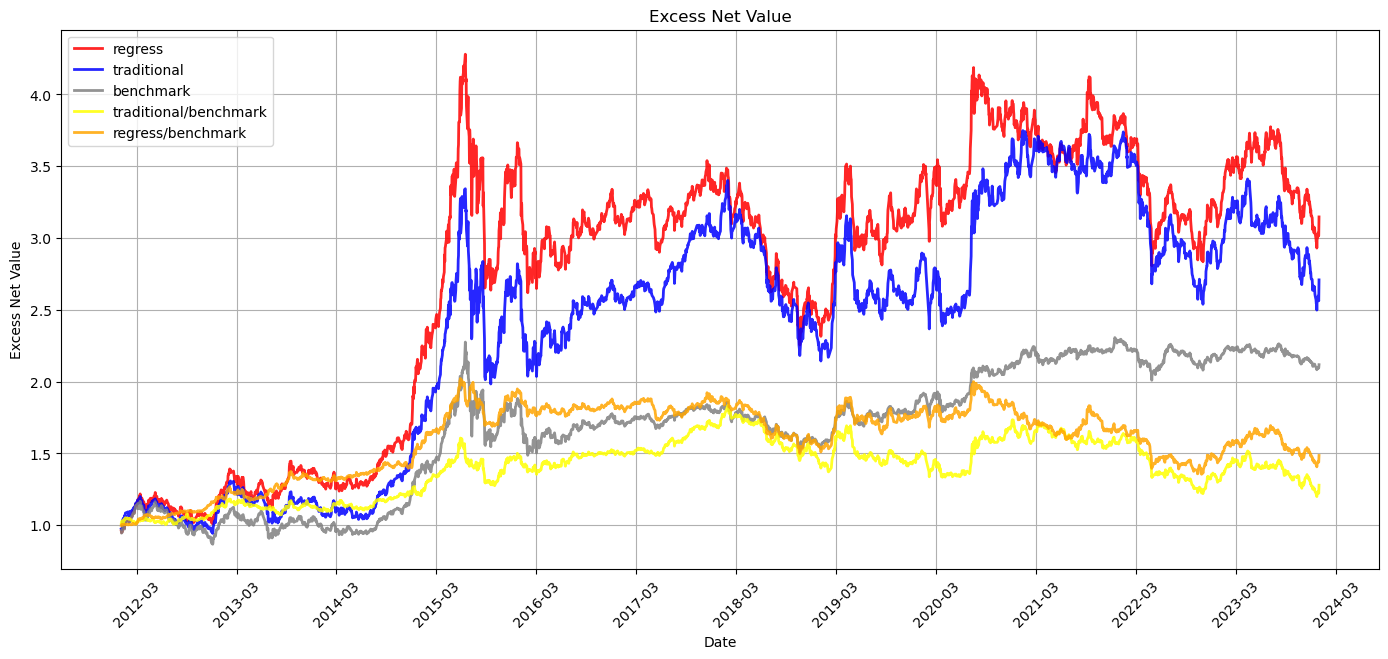

In [302]:
graph(regress_clean[1], traditional_clean[1], benchmark)

df1 = regress_clean
df2 = traditional_clean

fig, ax1 = plt.subplots(figsize=(17, 6))


df1.index = pd.to_datetime(df1.index)

ax1.plot(df1.index, df1, label='regress', color='r', linewidth=2, alpha = 0.85)
ax1.plot(df1.index, df2, label='traditional', color='b', linewidth=2, alpha = 0.85)
ax1.plot(df1.index, benchmark, label='benchmark', color='grey', linewidth=2, alpha = 0.85)
ax1.tick_params(axis='y', labelcolor='k')
ax2 = ax1.twinx()
ax2.plot(df1.index, df2/benchmark, label='traditional/benchmark', color='yellow', linewidth=2, alpha = 0.85)
ax2.plot(df1.index, df1.values/benchmark.values, label='regress/benchmark', color='orange', linewidth=2, alpha = 0.85)
ax2.tick_params(axis='y', labelcolor='k')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.show()




In [303]:
ben = filter_stocks1(price,idx).pct_change().mean(axis=1).dropna().cumsum()
ben = ben[ben.index <= '2024-01-01']

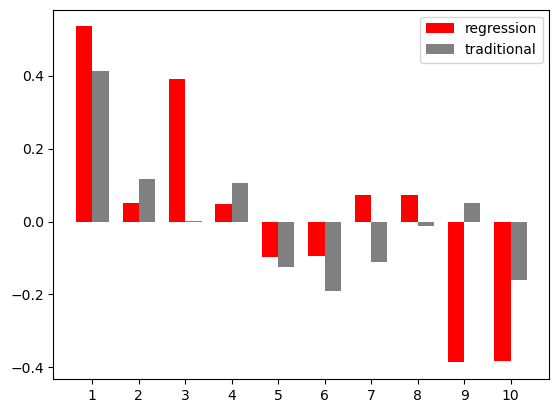

In [304]:
factor1 = reg.cumsum().apply(lambda x: x - ben.values)#reg.cumsum()
factor2 = tra.cumsum().apply(lambda x: x - ben.values)#tra.cumsum()


factor1_mean = factor1.mean()
factor2_mean = factor2.mean()

# ÁªòÂà∂ÂõæË°®
groups = range(1, 11)  # ÂçÅÂàÜÁªÑ
width = 0.35  # Êü±Áä∂ÂõæÁöÑÂÆΩÂ∫¶

fig, ax = plt.subplots()
bar1 = ax.bar(groups, factor1_mean, width, label='regression', color='red')
bar2 = ax.bar([p + width for p in groups], factor2_mean, width, label='traditional', color='grey')

# Ê∑ªÂä†Ê†áÁ≠æÂíåÊ†áÈ¢ò
ax.set_xticks([p + width/2 for p in groups])
ax.set_xticklabels(groups)
ax.legend()

# ÊòæÁ§∫ÂõæË°®
plt.show()

In [112]:
IC_series_regress = regress.corrwith(returns_df, axis=1, method="spearman").dropna()
IC_series_originla = traditional.corrwith(returns_df, axis=1, method="spearman").dropna()

In [113]:
IC_series_regress.mean()

-0.008527685618087144

In [114]:
IC_series_originla.mean()

-0.021140153278499708

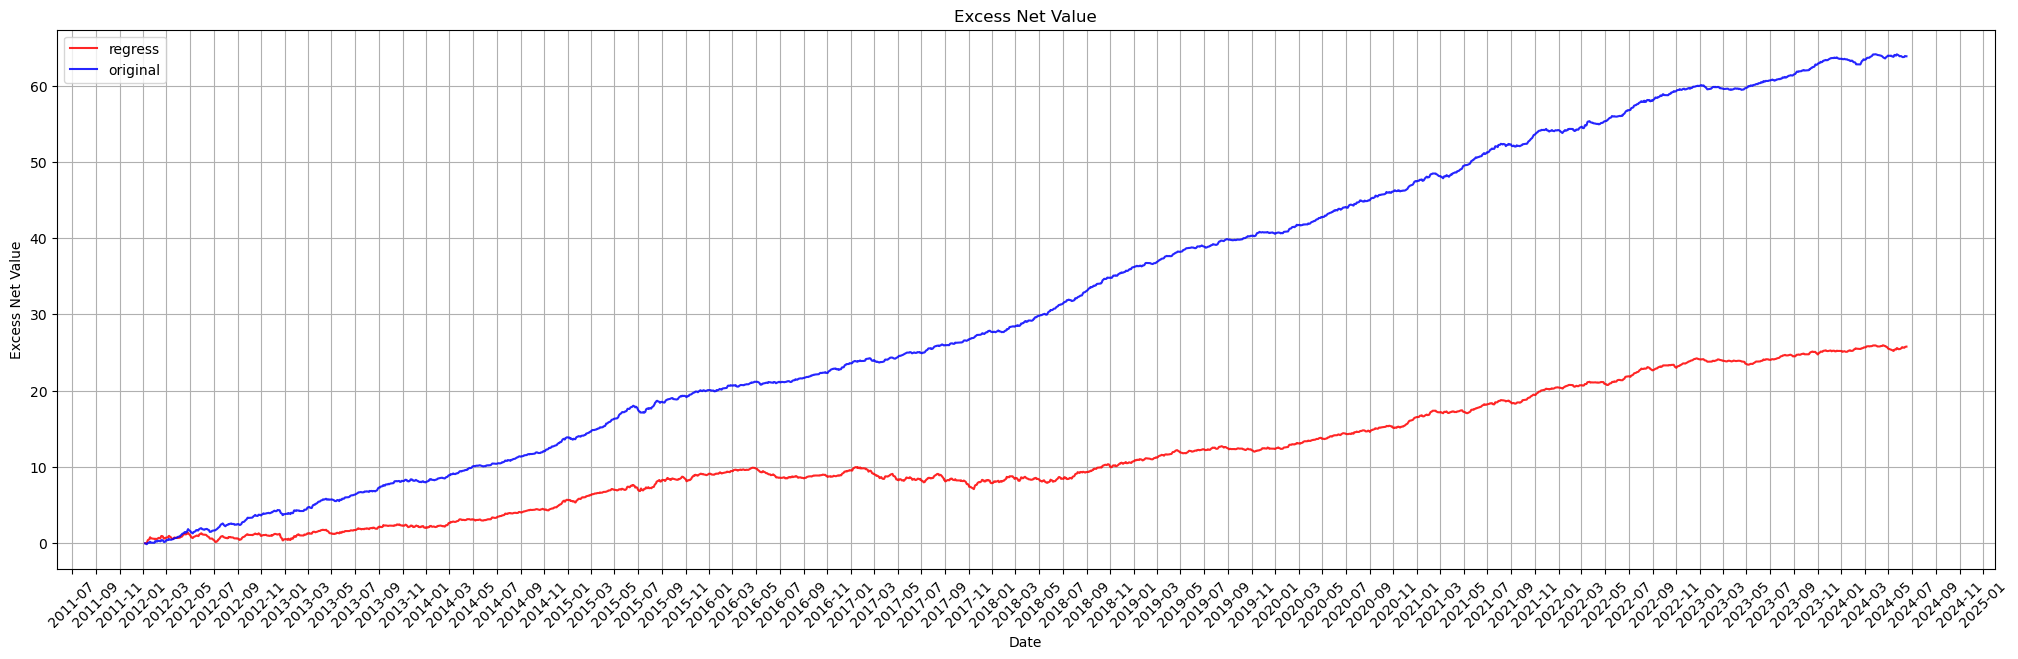

In [ ]:
plt.figure(figsize=(25, 7))
IC_series_originla.index = pd.to_datetime(IC_series_originla.index)
plt.plot(IC_series_originla.index, -IC_series_regress.cumsum(), label='regress', color='r', alpha = 0.85)
plt.plot(IC_series_originla.index, -IC_series_originla.cumsum(), label='original', color='b',alpha = 0.85)
    #plt.plot(all_average_returns_df.index, long_cumulative/short_cumulative, label='original version', color='orange',alpha = 0.85)#ÈúÄË¶ÅÂçïÁã¨‰∏Ä‰∏™Êï∞ËΩ¥
plt.xlabel('Date')
plt.ylabel('Excess Net Value')
plt.title('Excess Net Value')
    # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æÁöÑÊ†ºÂºè
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # ÊØèÈöî‰∏Ä‰∏™ÊúàÊòæÁ§∫‰∏ÄÊ¨°
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # ÊóãËΩ¨xËΩ¥Ê†áÁ≠æ‰ª•‰æøÊõ¥Â•ΩÁöÑÊòæÁ§∫
plt.show()

# 2.2 ùëôùëõ(ùëÑùë¢ùëéùëüùë°_ùê∏ùë°) = ùõΩ ‚ãÖ ln(ùëéùëèùë†(ùëÑùë¢ùëéùëüùë°_ùê∏ùë°‚àí4)) + ùõº + ùúÄ

# 2.4 ùëôùëõ(ùëÑùë¢ùëéùëüùë°_ùëÜ) = ùõΩ ‚ãÖ ùëôùëõ‚Å°(ùëÄùëâ) + ùõº + ùúÄ


# 2.8 ùëôùëõ(ùëáùëáùëÄ_ùëëùëñùë£) = ùõΩ ‚ãÖ ùëôùëõ‚Å°(ùëÄùëâ) + ùõº + ùúÄ

In [306]:
traditional = pd.read_csv(os.path.join(root, 'dividend_yield_ttm'),index_col=0)
#traditional = traditional.T
traditional = filter_stocks(traditional.T, idx)

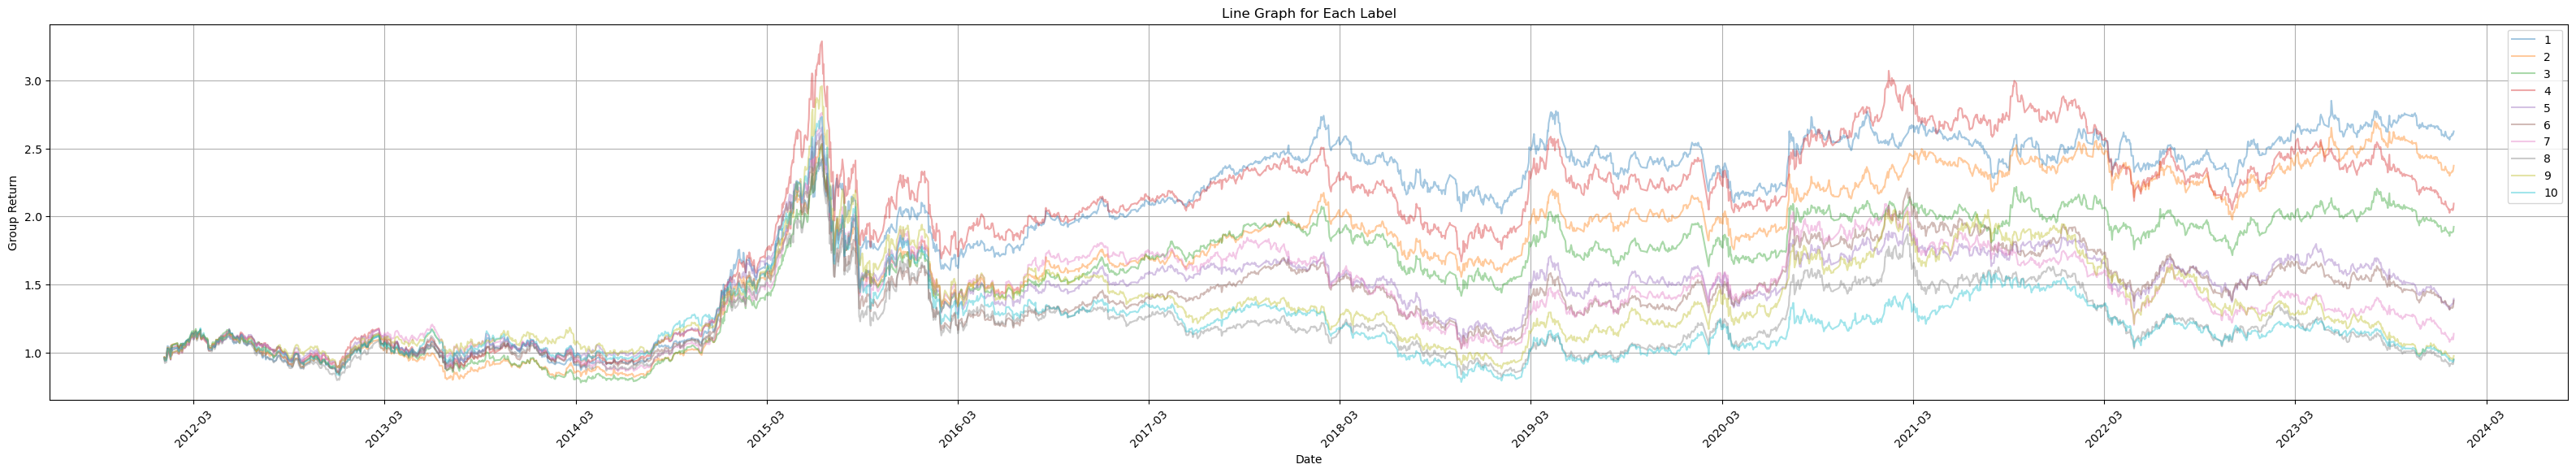

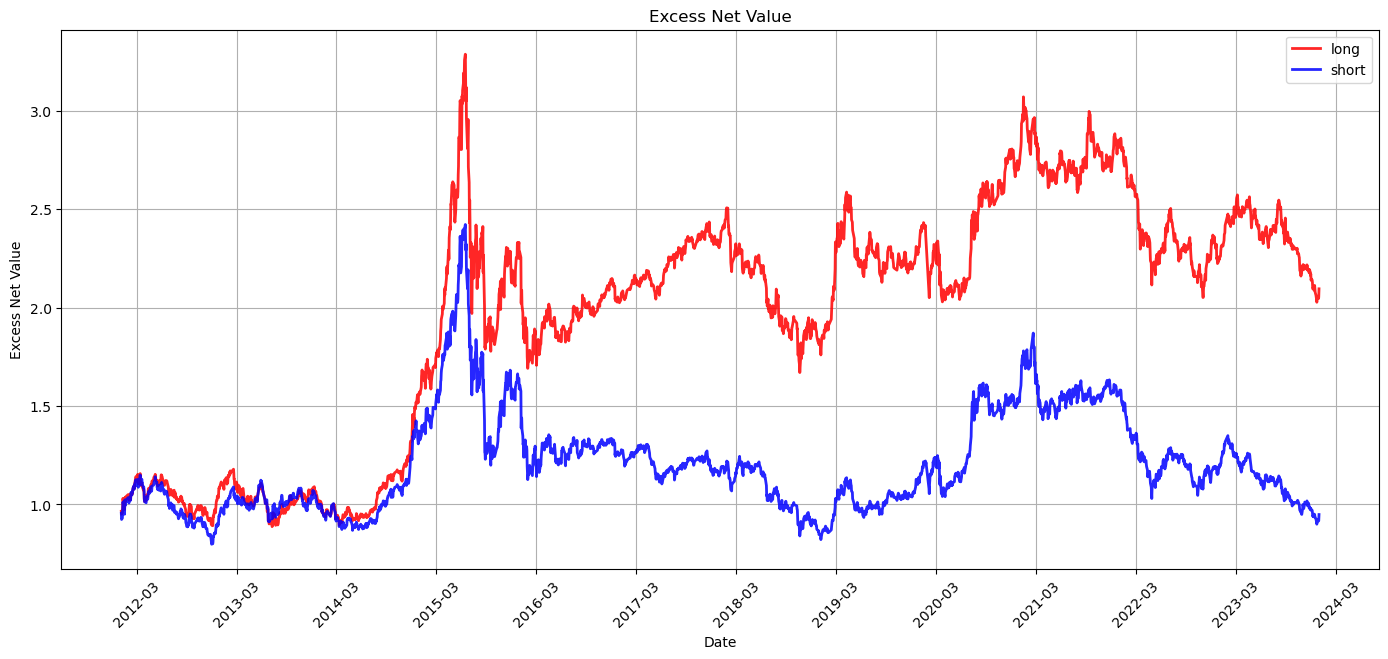

In [307]:
tra = func(traditional) #‰º†ÁªüÊñπÊ≥ï

In [ ]:
import cvxpy as cp
import numpy as np
import pandas as pd

# ÂÅáËÆæÊàë‰ª¨Êúâ‰ª•‰∏ãËæìÂÖ•Êï∞ÊçÆ
# f: Âõ†Â≠êÊö¥Èú≤Áü©ÈòµÔºåshape‰∏∫(n_stocks, n_factors)
# X: ËÇ°Á•®‰ª∑Ê†ºÂõ†Â≠êÈ£éÈô©Êö¥Èú≤Áü©ÈòµÔºåshape‰∏∫(n_stocks, n_factors)
# w_b: Âü∫ÂáÜÁªÑÂêàÁöÑÊùÉÈáçÔºåshape‰∏∫(n_stocks,)
# s_l, s_h: Âõ†Â≠êÊö¥Èú≤È£éÈô©ÈôêÂà∂ÁöÑ‰∏ãÈôêÂíå‰∏äÈôêÔºåshape‰∏∫(n_factors,)
# h_l, h_h: Ë°å‰∏öÂÅèÁ¶ªÂ∫¶ÈôêÂà∂ÁöÑ‰∏ãÈôêÂíå‰∏äÈôêÔºåshape‰∏∫(n_industries,)
# w_l, w_h: ‰∏™ËÇ°ÊùÉÈáçÈôêÂà∂ÁöÑ‰∏ãÈôêÂíå‰∏äÈôêÔºåshape‰∏∫(n_stocks,)
# b_l, b_h: ÊàêÂàÜËÇ°ÊùÉÈáçÂç†ÊØîÈôêÂà∂ÁöÑ‰∏ãÈôêÂíå‰∏äÈôêÔºåshape‰∏∫(n_stocks,)
# w_0: ‰∏äÊúüÊåÅ‰ªìÊùÉÈáçÔºåshape‰∏∫(n_stocks,)
# t_0h: Êç¢ÊâãÁéá‰∏äÈôê

# Á§∫‰æãÊï∞ÊçÆÔºàËØ∑Ê†πÊçÆ‰Ω†ÁöÑÂÆûÈôÖÊï∞ÊçÆËøõË°åÊõøÊç¢Ôºâ
n_stocks = 100
n_factors = 10
n_industries = 5

f = np.random.randn(n_stocks, n_factors)
X = np.random.randn(n_stocks, n_factors)
w_b = np.random.rand(n_stocks)
s_l = np.random.rand(n_factors)
s_h = s_l + np.random.rand(n_factors)
h_l = np.random.rand(n_industries)
h_h = h_l + np.random.rand(n_industries)
w_l = np.zeros(n_stocks)
w_h = np.ones(n_stocks)
b_l = np.zeros(n_stocks)
b_h = np.ones(n_stocks)
w_0 = np.random.rand(n_stocks)
t_0h = 0.1

# ÂÆö‰πâÂèòÈáè
w = cp.Variable(n_stocks)

# ÁõÆÊ†áÂáΩÊï∞ÔºöÊúÄÂ§ßÂåñÂçïÂõ†Â≠êÊö¥Èú≤ f.T @ w
objective = cp.Maximize(f.T @ w)

# Á∫¶ÊùüÊù°‰ª∂
constraints = [
    s_l <= X @ (w - w_b), X @ (w - w_b) <= s_h,
    h_l <= X @ (w - w_b), X @ (w - w_b) <= h_h,
    w_l <= w, w <= w_h,
    b_l <= w, w <= b_h,
    cp.sum(w) == 1,
    cp.norm(w - w_0, 1) <= t_0h
]

# ÂÆö‰πâ‰ºòÂåñÈóÆÈ¢ò
problem = cp.Problem(objective, constraints)

# Ê±ÇËß£‰ºòÂåñÈóÆÈ¢ò
result = problem.solve()

# ËæìÂá∫ÁªìÊûú
print("Optimal weights:", w.value)
